<a href="https://colab.research.google.com/github/MarcosRoms/Deep_learning_colab/blob/main/1_MNIST_ALUMNOS_DIPLOMADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ORGANIZAMOS NUESTROS CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalizar las imágenes a valores entre 0 y 1
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convertir las etiquetas a un formato categórico (one-hot encoding)
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
validation_split = 0.1
num_validation_samples = int(validation_split * train_images.shape[0])

# Crear conjuntos de entrenamiento y validación
x_train, x_val = train_images[num_validation_samples:], train_images[:num_validation_samples]
y_train, y_val = train_labels[num_validation_samples:], train_labels[:num_validation_samples]

# Verificar el tamaño de los datos
print(f'Training data shape: {x_train.shape}')
print(f'Validation data shape: {x_val.shape}')
print(f'Test data shape: {test_images.shape}')


Training data shape: (54000, 28, 28, 1)
Validation data shape: (6000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


Usamos matplotlib para mostrar algunas imágenes de CIFAR10

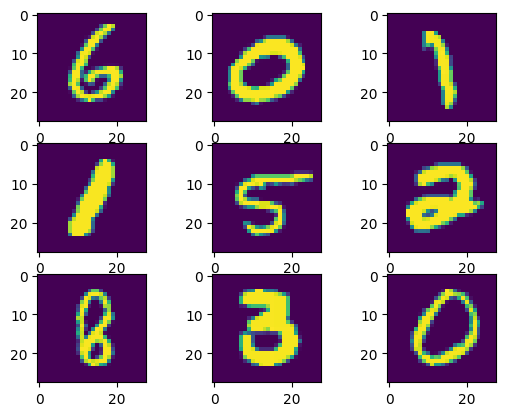

In [ ]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(330 + 1 + i) # El 330 indica la cantidad de rows y columnas
    plt.imshow(x_train[i])

plt.show()

Usamos el método to_categoriacal para asignar a cada imagen una categoría.

SE BARAJEAN LAS IMÁGENES PARA EL ENTRENAMIENTO Y VALIDACIÓN

In [ ]:
import numpy as np

np.random.seed(42)

# barajamos el dataset
permutation = np.random.permutation(x_train.shape[0])
x_train = x_train[permutation]
y_train = y_train[permutation]

# obtenemos el conjunto de validación
num_val = 10000
x_val = x_train[:num_val]
x_train = x_train[num_val:]
y_val = y_train[:num_val]
y_train = y_train[num_val:]

# DEFINIMOS LA ARQUITECTURA CNN

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Segunda capa
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Aplanado y calificacion
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Definimos los hiperparámetros

In [ ]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

train_log = model.fit(x_train, y_train,
                      epochs=50, batch_size=128,
                     validation_data=(x_val, y_val))

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.9879 - loss: 0.0401 - val_acc: 0.9862 - val_loss: 0.0506
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9900 - loss: 0.0336 - val_acc: 0.9858 - val_loss: 0.0472
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9907 - loss: 0.0312 - val_acc: 0.9877 - val_loss: 0.0419
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9918 - loss: 0.0288 - val_acc: 0.9882 - val_loss: 0.0394
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9919 - loss: 0.0257 - val_acc: 0.9835 - val_loss: 0.0549
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9925 - loss: 0.0251 - val_acc: 0.9885 - val_loss: 0.0395
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9935 - loss: 0.0220 - val_acc: 0.9845 - val_loss: 0.0498
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9936 - loss: 0.0198 - val_acc: 0.9892 - val_loss: 0.0402
Epoch 9/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - ac

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,244,374 (16.19 MB)

 Trainable params: 2,122,186 (8.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,122,188 (8.10 MB)

# Ejemplo para graficar la perdida y exactitud del entrenamiento y el conjunto de validación

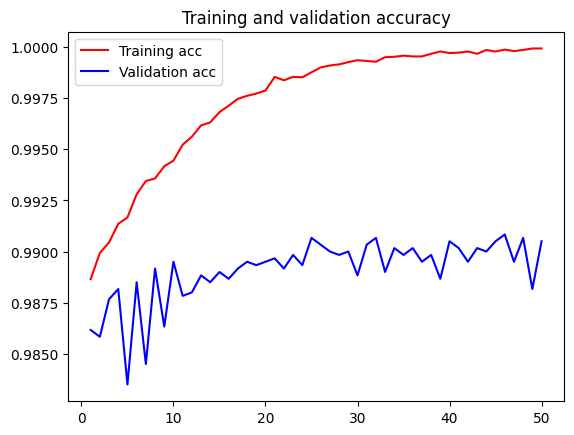

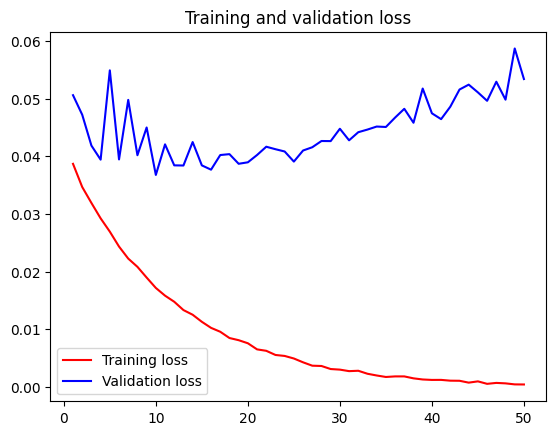

In [ ]:
import matplotlib.pyplot as plt

acc = train_log.history['acc']
val_acc = train_log.history['val_acc']
loss = train_log.history['loss']
val_loss = train_log.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# UNA SEGUNDA PROPUESTA DE ARQUITECTURA considerando el Dropout

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dropout(0.3))
model2.add(layers.Dense(10, activation='softmax'))

Se definen los Hiperparámetros

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
train_log2 = model2.fit(x_train, y_train,
                      epochs=50, batch_size=128,
                     validation_data=(x_val, y_val))

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.6697 - loss: 1.1616 - val_acc: 0.9357 - val_loss: 0.2403
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9130 - loss: 0.2884 - val_acc: 0.9603 - val_loss: 0.1409
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9446 - loss: 0.1830 - val_acc: 0.9703 - val_loss: 0.1000
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9580 - loss: 0.1393 - val_acc: 0.9763 - val_loss: 0.0810
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9641 - loss: 0.1182 - val_acc: 0.9783 - val_loss: 0.0691
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9699 - loss: 0.0994 - val_acc: 0.9805 - val_loss: 0.0623
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9734 - loss: 0.0858 - val_acc: 0.9840 - val_loss: 0.0543
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9755 - loss: 0.0804 - val_acc: 0.9850 - val_loss: 0.0506
Epoch 9/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - a

Se grafican los resultados

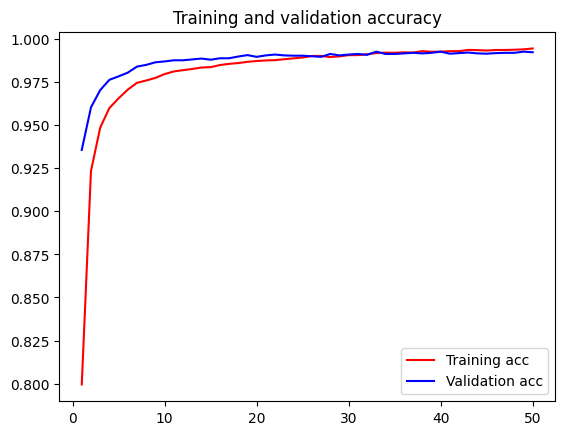

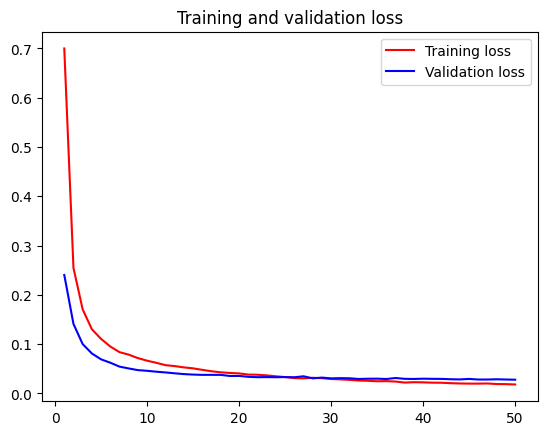

In [ ]:
import matplotlib.pyplot as plt

acc = train_log2.history['acc']
val_acc = train_log2.history['val_acc']
loss = train_log2.history['loss']
val_loss = train_log2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#EJERCICIO, PROPONGA SU PROPIA ARQUITECTURA Y GRAFIQUE SUS RESULTADOS.

In [ ]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.25))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.25))
model3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.5))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(10, activation='softmax'))

In [ ]:
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True, mode='min')

In [ ]:
train_log3 = model3.fit(x_train, y_train,
                      epochs=50, batch_size=128,
                     validation_data=(x_val, y_val),
                        callbacks=[early_stop])

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - acc: 0.3400 - loss: 1.8285 - val_acc: 0.9358 - val_loss: 0.2271
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - acc: 0.8866 - loss: 0.3637 - val_acc: 0.9597 - val_loss: 0.1331
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc: 0.9338 - loss: 0.2188 - val_acc: 0.9742 - val_loss: 0.0902
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - acc: 0.9479 - loss: 0.1683 - val_acc: 0.9787 - val_loss: 0.0732
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - acc: 0.9570 - loss: 0.1387 - val_acc: 0.9818 - val_loss: 0.0641
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - acc: 0.9619 - loss: 0.1201 - val_acc: 0.9837 - val_loss: 0.0574
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - acc: 0.9668 - loss: 0.1079 - val_acc: 0.9853 - val_loss: 0.0510
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - acc: 0.9708 - loss: 0.0951 - val_acc: 0.9857 - val_loss: 0.0496
Epoch 9/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step

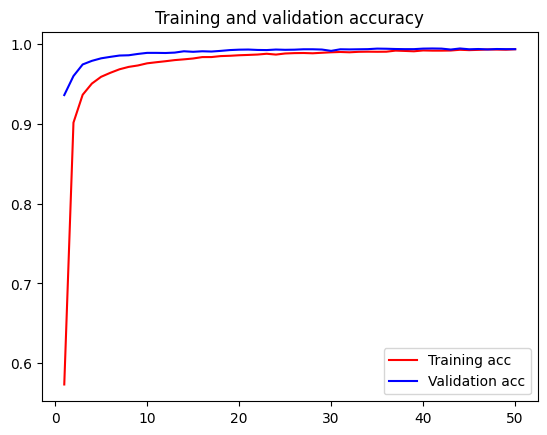

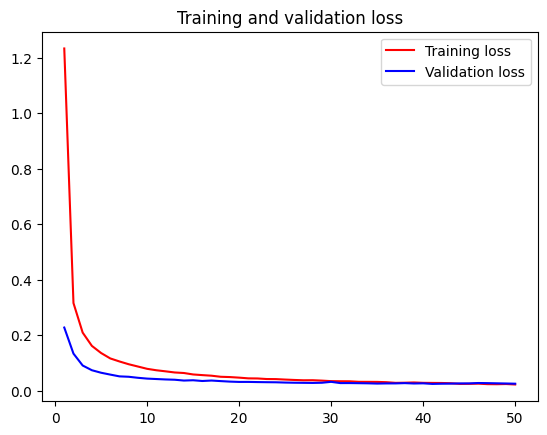

In [ ]:
import matplotlib.pyplot as plt

acc = train_log3.history['acc']
val_acc = train_log3.history['val_acc']
loss = train_log3.history['loss']
val_loss = train_log3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Evaluacion

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 4s - 12ms/step - acc: 0.9908 - loss: 0.0372

Test accuracy: 0.9908000230789185


In [ ]:
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 3ms/step - acc: 0.9933 - loss: 0.0198

Test accuracy: 0.9933000206947327


In [ ]:
test_loss, test_acc = model3.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - 6ms/step - acc: 0.9955 - loss: 0.0148

Test accuracy: 0.9955000281333923


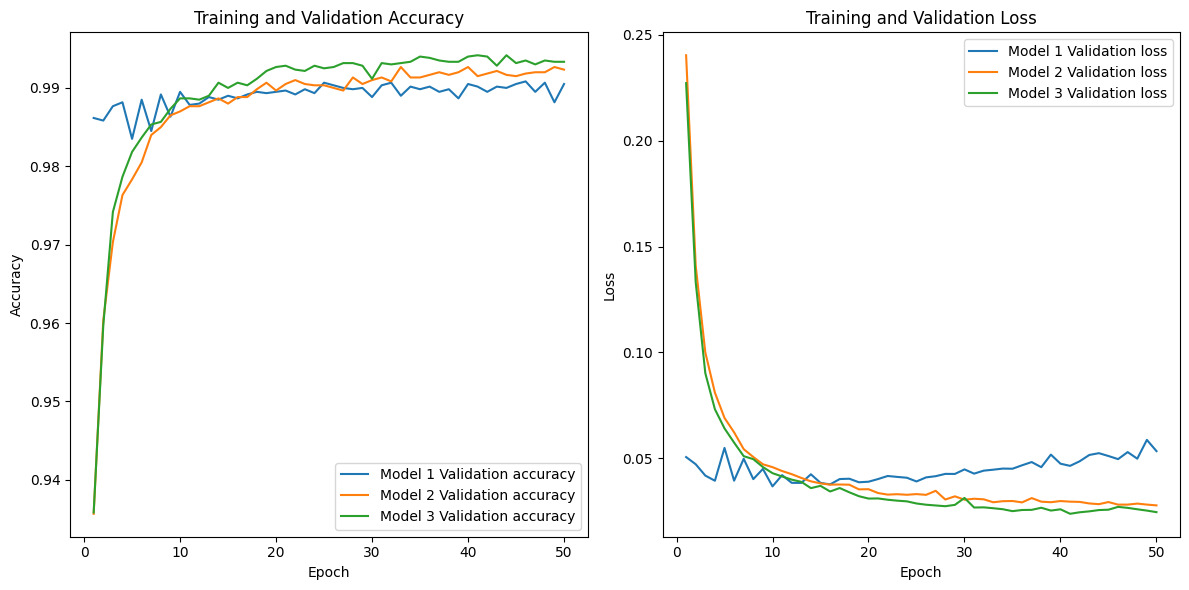

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(train_log, label_prefix):
    acc = train_log.history['acc']
    val_acc = train_log.history['val_acc']
    epochs = range(1, len(acc) + 1)

    # plt.plot(epochs, acc, label=f'{label_prefix} Training accuracy')
    plt.plot(epochs, val_acc, label=f'{label_prefix} Validation accuracy')

def plot_loss(train_log, label_prefix):
    loss = train_log.history['loss']
    val_loss = train_log.history['val_loss']
    epochs = range(1, len(loss) + 1)

    # plt.plot(epochs, loss, label=f'{label_prefix} Training loss')
    plt.plot(epochs, val_loss, label=f'{label_prefix} Validation loss')

# Crear gráficos
plt.figure(figsize=(12, 6))

# Precisión (Accuracy)
plt.subplot(1, 2, 1)
plot_accuracy(train_log, 'Model 1')
plot_accuracy(train_log2, 'Model 2')
plot_accuracy(train_log3, 'Model 3')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Pérdida (Loss)
plt.subplot(1, 2, 2)
plot_loss(train_log, 'Model 1')
plot_loss(train_log2, 'Model 2')
plot_loss(train_log3, 'Model 3')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


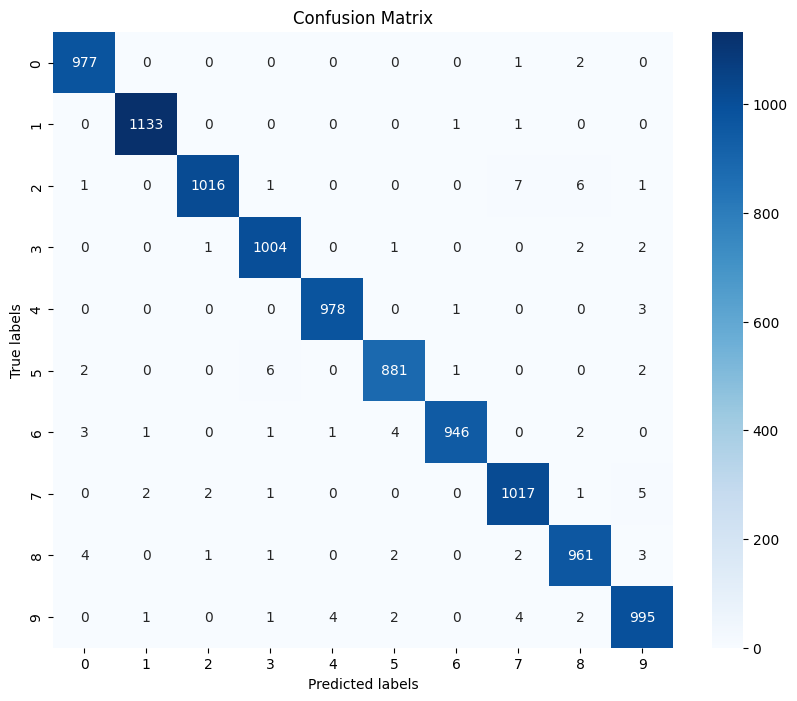

Precision for each class: [0.98986829 0.99648197 0.99607843 0.98916256 0.99491353 0.98988764
 0.99683878 0.98546512 0.98463115 0.98417409]
Recall for each class: [0.99693878 0.99823789 0.98449612 0.99405941 0.99592668 0.98766816
 0.9874739  0.98929961 0.98665298 0.98612488]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Hacer predicciones con el modelo
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calcular precisión y exhaustividad
precision = precision_score(true_labels, predicted_labels, average=None)
recall = recall_score(true_labels, predicted_labels, average=None)
report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])

# Mostrar la matriz de confusión usando un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Mostrar precisión y exhaustividad
print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("\nClassification Report:\n", report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


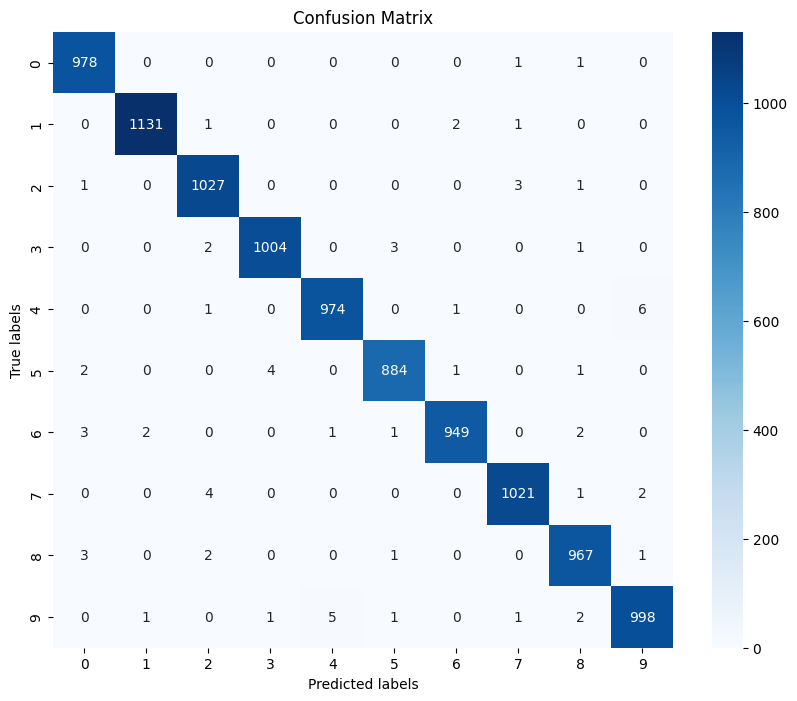

Precision for each class: [0.99088146 0.9973545  0.9903568  0.9950446  0.99387755 0.99325843
 0.99580273 0.99415774 0.99077869 0.99106256]
Recall for each class: [0.99795918 0.99647577 0.99515504 0.99405941 0.99185336 0.99103139
 0.99060543 0.99319066 0.99281314 0.98909812]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Hacer predicciones con el modelo
predictions = model2.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calcular precisión y exhaustividad
precision = precision_score(true_labels, predicted_labels, average=None)
recall = recall_score(true_labels, predicted_labels, average=None)
report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])

# Mostrar la matriz de confusión usando un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Mostrar precisión y exhaustividad
print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("\nClassification Report:\n", report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


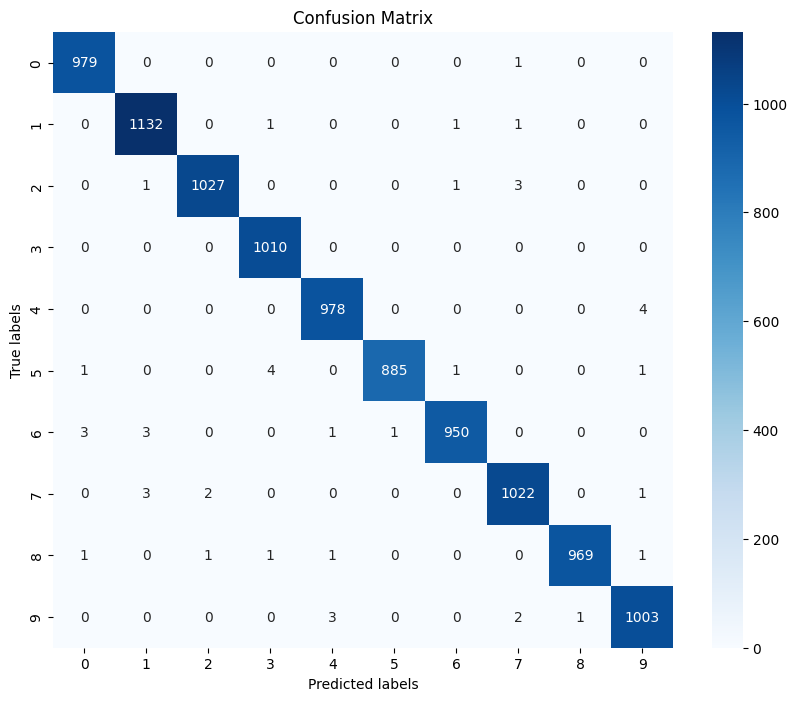

Precision for each class: [0.9949187  0.99385426 0.99708738 0.99409449 0.99491353 0.99887133
 0.99685205 0.99319728 0.99896907 0.99306931]
Recall for each class: [0.99897959 0.99735683 0.99515504 1.         0.99592668 0.99215247
 0.99164927 0.99416342 0.99486653 0.99405352]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      1.00       982
           5       1.00      0.99      1.00       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Hacer predicciones con el modelo
predictions = model3.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calcular precisión y exhaustividad
precision = precision_score(true_labels, predicted_labels, average=None)
recall = recall_score(true_labels, predicted_labels, average=None)
report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])

# Mostrar la matriz de confusión usando un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Mostrar precisión y exhaustividad
print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("\nClassification Report:\n", report)
